In [1]:
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
import yaml

from model.model import get_model
from data_loader import TrainDataModule, get_all_test_dataloaders, get_normal_test_dataloader, get_train_dataloader

# autoreload imported modules
%load_ext autoreload
%autoreload 2
%matplotlib inline


# with open("./configs/ganomaly_config.yaml", "r") as f:
with open("./configs/ganomaly_config.yaml", "r") as f:
    config = yaml.safe_load(f)

# Reproducibility
pl.seed_everything(config["seed"])

test_dataloaders = get_all_test_dataloaders(config['split_dir'], config['target_size'], config['batch_size'])


Global seed set to 42


img_csv='./data/splits/absent_septum.csv' 
 len(self.img_paths)=1
img_csv='./data/splits/artefacts.csv' 
 len(self.img_paths)=16
img_csv='./data/splits/craniatomy.csv' 
 len(self.img_paths)=15
img_csv='./data/splits/dural.csv' 
 len(self.img_paths)=7
img_csv='./data/splits/ea_mass.csv' 
 len(self.img_paths)=4
img_csv='./data/splits/edema.csv' 
 len(self.img_paths)=18
img_csv='./data/splits/encephalomalacia.csv' 
 len(self.img_paths)=1
img_csv='./data/splits/enlarged_ventricles.csv' 
 len(self.img_paths)=19
img_csv='./data/splits/intraventricular.csv' 
 len(self.img_paths)=1
img_csv='./data/splits/lesions.csv' 
 len(self.img_paths)=22
img_csv='./data/splits/mass.csv' 
 len(self.img_paths)=22
img_csv='./data/splits/posttreatment.csv' 
 len(self.img_paths)=44
img_csv='./data/splits/resection.csv' 
 len(self.img_paths)=10
img_csv='./data/splits/sinus.csv' 
 len(self.img_paths)=2
img_csv='./data/splits/wml.csv' 
 len(self.img_paths)=5
img_csv='./data/splits/other.csv' 
 len(self.img_paths)=

In [2]:
# load model from checkpit
from model.ganomaly.lightning_model import Ganomaly


model = get_model(config)
# Specify the path to your checkpoint file
# checkpoint_path = '/home/marcel/Projects/uni/mad_seminar/lightning_logs/version_4/checkpoints/epoch=49-step=300.ckpt'
#latent512
# checkpoint_path = "/home/marcel/Projects/uni/mad_seminar/lightning_logs/version_5/checkpoints/epoch=49-step=400.ckpt"
# latent 1024
# checkpoint_path = "/home/marcel/Projects/uni/mad_seminar/lightning_logs/version_6/checkpoints/epoch=99-step=800.ckpt"
# extra lyers:2 latent 1248?
checkpoint_path = "/home/marcel/Projects/uni/mad_seminar/lightning_logs/version_11/checkpoints/epoch=99-step=1200.ckpt"
# Initialize the model by loading from the checkpoint
model.load_state_dict(torch.load(checkpoint_path)['state_dict'])


Loading model ganomaly


<All keys matched successfully>

In [3]:
from ganomaly_eval import  GanomalyEvaluator, EvalType
normal_test_dataloader = get_normal_test_dataloader(config['split_dir'], config['target_size'], config['batch_size'])
train_dataloader = get_train_dataloader(config['split_dir'], config['target_size'], config['batch_size'])
all_data_loaders = test_dataloaders.copy()
all_data_loaders.update({"normal":normal_test_dataloader})
all_data_loaders.update({"train":train_dataloader})


evaluator = GanomalyEvaluator(model, all_data_loaders)

evaluator.evaluate_model(normalize=True)

img_csv='./data/splits/normal_test.csv' 
 len(self.img_paths)=30


## Stats

In [4]:
# evaluator.normalize_scores()
evaluator.print_stats_table()

                    Statistics of Anomaly Scores per categroy                     
┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┓
┃ Pathology           ┃ Minimum ┃ Maximum ┃ Median ┃  Mean ┃ Variance ┃ #Samples ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━┩
│ absent_septum       │    0.67 │    0.67 │   0.67 │  0.67 │     0.00 │        1 │
│ artefacts           │    0.00 │    0.21 │   0.08 │  0.08 │     0.00 │       16 │
│ craniatomy          │    0.07 │    0.36 │   0.20 │  0.20 │     0.01 │       15 │
│ dural               │    0.04 │    0.78 │   0.14 │  0.23 │     0.06 │        7 │
│ ea_mass             │    0.12 │    0.39 │   0.30 │  0.28 │     0.01 │        4 │
│ edema               │    0.02 │    0.66 │   0.27 │  0.29 │     0.03 │       18 │
│ encephalomalacia    │    1.00 │    1.00 │   1.00 │  1.00 │     0.00 │        1 │
│ enlarged_ventricles │    0.08 │    0.51 │   0.22 │  0.23 │     0.01 │       19 │
│ intraventricular    │    0.34 │    0.34 │   0.34 │  0.34 │     0.00 │        1 │
│ lesions             │    0.06 │    0.34 │   0.18 │  0.18 │     0.01 │       22 │
│ mass                │    0.11 │    0.57 │   0.21 │  0.27 │     0.03 │       22 │
│ posttreatment       │    0.00 │    0.40 │   0.11 │  0.14 │     0.01 │       44 │
│ resection           │    0.02 │    0.87 │   0.29 │  0.29 │     0.05 │       10 │
│ sinus               │    0.36 │    0.38 │   0.37 │  0.37 │     0.00 │        2 │
│ wml                 │    0.12 │    0.29 │   0.26 │  0.21 │     0.01 │        5 │
│ other               │    0.24 │    0.54 │   0.32 │  0.35 │     0.01 │        5 │
│ normal              │    0.01 │    0.51 │   0.13 │  0.15 │     0.01 │       30 │
│ train               │   -0.04 │    0.03 │  -0.03 │ -0.03 │     0.00 │      711 │
└─────────────────────┴─────────┴─────────┴────────┴───────┴──────────┴──────────┘

## Histograms

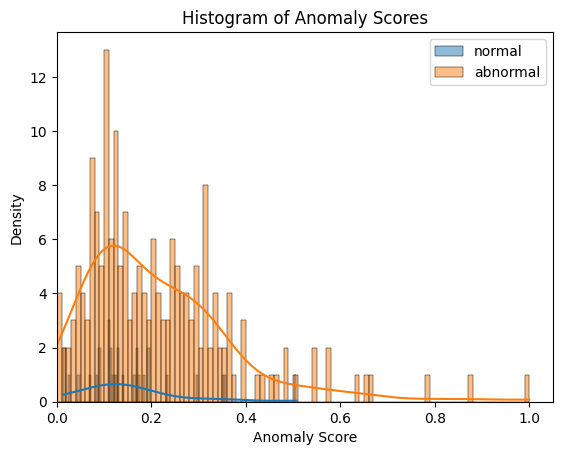

In [5]:
evaluator.histplot()

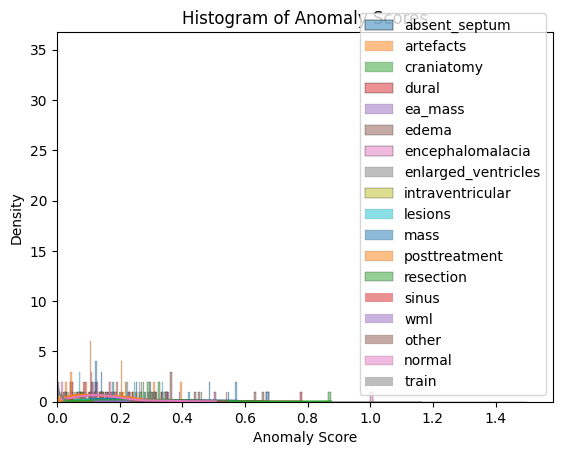

In [6]:
evaluator.histplot(eval_type=EvalType.ALL)

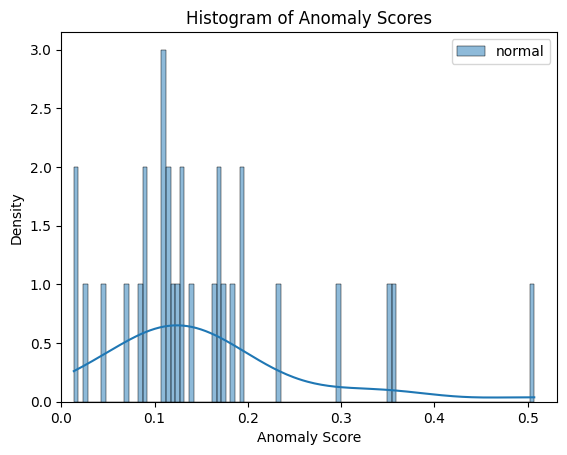

In [7]:
evaluator.histplot(EvalType.NORMAL)

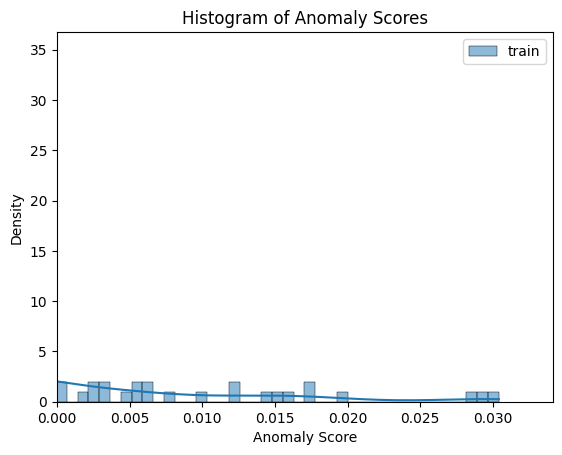

In [8]:
evaluator.histplot(EvalType.TRAIN)

# Metrics

## Find optimal threshold

In [10]:
optimal_threshold = evaluator.find_optimal_threshold_f1()
print(optimal_threshold)

ValueError: Found input variables with inconsistent numbers of samples: [933, 222]

## General classification report

In [ ]:
evaluator.classification_report(threshold=optimal_threshold)

## Confusion matrix

In [ ]:
evaluator.plot_confusion_matrix(threshold=optimal_threshold)

## AUROC

In [ ]:
# evaluator.roc_auc_score()
evaluator.plot_auroc()

## PRC AUC

In [ ]:
# evaluator.prc_auc_score()
evaluator.plot_auprc()

# Reconstructions

## Test set - Normal data

In [ ]:
evaluator.plot_in_rec(label="normal", n=3)

## Recon for normal train data

In [ ]:
evaluator.plot_in_rec(label="train", n=3)

## Recon for abnormal

In [ ]:
evaluator.plot_in_rec(label="resection", n=3)

In [ ]:
# fig_example.savefig(f"example_{config['num_epochs']}.png")